In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
import random

In [4]:
import pandas as pd

# Load Dataset

In [6]:
X_train = np.loadtxt(r"C:\Users\ASUS\DL practice\Image Classification CNN Keras Dataset\input.csv", delimiter = ',')
Y_train = np.loadtxt(r'C:\Users\ASUS\DL practice\Image Classification CNN Keras Dataset\labels.csv', delimiter = ',')

X_test = np.loadtxt(r'C:\Users\ASUS\DL practice\Image Classification CNN Keras Dataset\input_test.csv', delimiter = ',')
Y_test = np.loadtxt(r'C:\Users\ASUS\DL practice\Image Classification CNN Keras Dataset\labels_test.csv', delimiter = ',')

In [7]:
X_test.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
print(type(X_test))  # Output the type of X_test


In [ ]:
import pandas as pd
X_test_df = pd.DataFrame(X_test)
print(X_test_df.head())  # Works like in pandas


In [ ]:
X_test_df.head()

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape) ## 1st a total number of images and second ta 100x100x3

In [ ]:
## reshapping to remove the comma
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

In [ ]:
X_train[1,:]

In [ ]:
##Rescaling the value from Zero to One
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train[1,:]

In [ ]:
idx = random.randint(0, len(X_train)) #######
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [21]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,093,665 (4.17 MB)

 Trainable params: 1,093,665 (4.17 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
### different way of writing the same model
'''
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
'''

"\nmodel = Sequential()\n\nmodel.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))\nmodel.add(MaxPooling2D((2,2)))\n\nmodel.add(Conv2D(32, (3,3), activation = 'relu'))\nmodel.add(MaxPooling2D((2,2)))\n\nmodel.add(Flatten())\nmodel.add(Dense(64, activation = 'relu'))\nmodel.add(Dense(1, activation = 'sigmoid'))\n"

In [54]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [56]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.5117 - loss: 0.7205
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.5668 - loss: 0.6775
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6356 - loss: 0.6337
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.6705 - loss: 0.5922
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.7541 - loss: 0.5253


In [57]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7926 - loss: 0.4675


[0.6557192802429199, 0.637499988079071]

# Making predictions

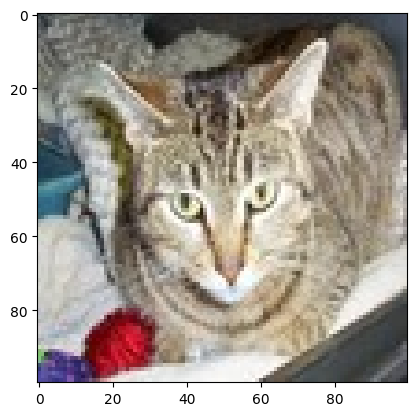

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.5696273]]


In [66]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)

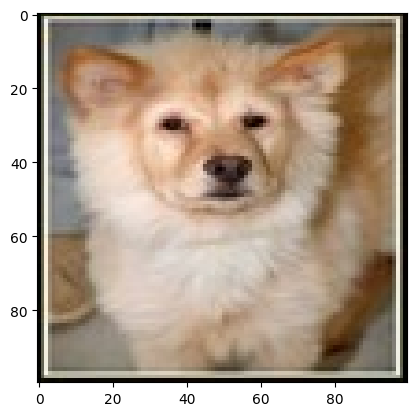

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Our model says it is a : dog


In [72]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)